# BIG DATA JOBS

Learn all about the current state of the Big Data jobs offerings, in this case study we will focus on the Data Analyst role, but this dataset contains information about ML, Data Scientists, Data Engineers...

## DATA ANALYST:

Data analysis made with Python

## LOAD DATASET

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv, sqlite3
import pandas as pd


In [2]:
# Provide the file path of your CSV file
csv_file = "data_science_job.csv"

# Load the CSV file into a DataFrame with specified encoding
df = pd.read_csv(csv_file, encoding='latin-1')



In [3]:
df.head()

,company,job_title,location,job_type,experience_level,salary,requirements,facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


## CLEAN DATA

In [4]:
df = df.drop('facilities', axis=1)

In [5]:
df = df.drop('company', axis=1)

## QUICK LOOK

In [6]:
df.describe()

,job_title,location,job_type,experience_level,salary,requirements
count,3197,3197,3197,2962,3009,3198
unique,2105,1070,3,4,166,2600
top,Data Engineer,United States,Full Time,Senior-level,115K,"Big Data,Business Intelligence,Data analysis,E..."
freq,184,370,3116,1876,260,12


## 1. TOP 10 JOBS

In [7]:
top_10 = df['job_title'].value_counts().head(10)
top_10

job_title
Data Engineer                    184
Data Analyst                     132
Data Scientist                    88
Machine Learning Engineer         68
Senior Data Scientist             37
Analytics Engineer                17
Data Architect                    12
Senior Analytics Engineer         11
Business Intelligence Analyst     10
Data Analyst Intern               10
Name: count, dtype: int64

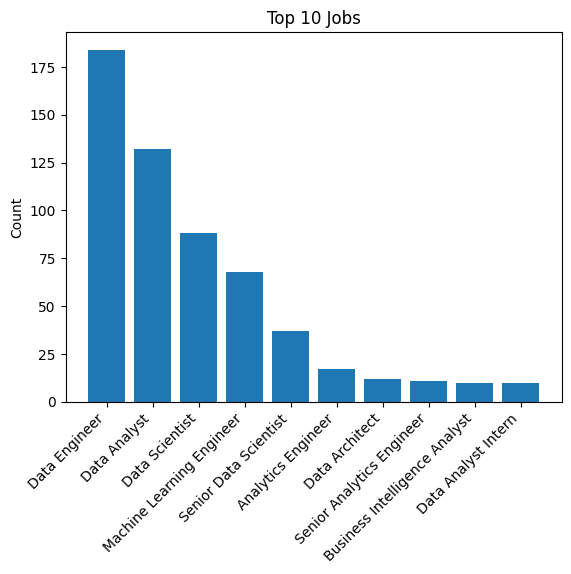

In [8]:
top_10 = df['job_title'].value_counts().head(10)

# Create a bar chart
plt.bar(top_10.index, top_10.values)

# Customize the plot
plt.xlabel('')
plt.ylabel('Count')
plt.title('Top 10 Jobs')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 2. TOP 10 COUNTRIES

In [9]:
top_loca = df['location'].value_counts().head(10)
top_loca

location
United States                 370
United Kingdom                135
India                         114
Paris, France                  79
Remote                         67
Spain                          38
Berlin, Germany                37
Bangkok                        28
Johannesburg, South Africa     15
Heredia, Costa Rica            13
Name: count, dtype: int64

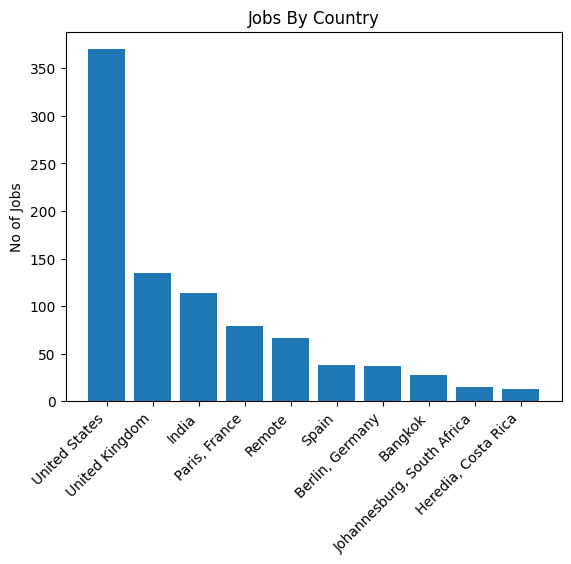

In [10]:
# Create a bar chart
plt.bar(top_loca.index, top_loca.values)

# Customize the plot
plt.xlabel('')
plt.ylabel('No of Jobs')
plt.title('Jobs By Country')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 3. DATA ANALYSTS DEMAND PER COUNTRY

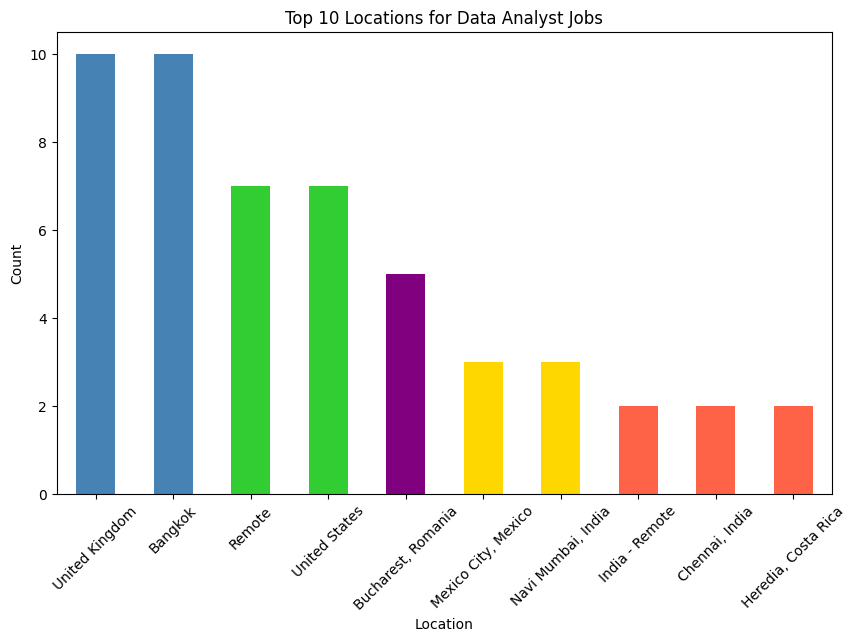

In [11]:
# Assuming your DataFrame is named 'df'

# Step 1: Filter rows with job_title = 'Data Analyst' (case-insensitive)
filtered_df = df[df['job_title'].str.lower() == 'data analyst'.lower()]

# Step 2: Group by 'location' and count occurrences
location_counts = filtered_df.groupby('location').size()

# Step 3: Sort locations in descending order
sorted_locations = location_counts.sort_values(ascending=False)

# Step 4: Select top 10 locations
top_10_locations = sorted_locations.head(10)

# Create the bar chart with custom colors
colors = ['steelblue', 'steelblue', 'limegreen', 'limegreen', 'purple',
          'gold', 'gold', 'tomato', 'tomato', 'tomato']

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=colors)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations for Data Analyst Jobs')
plt.xticks(rotation=45)

plt.show()

In [12]:
top_10_locations

location
United Kingdom         10
Bangkok                10
Remote                  7
United States           7
Bucharest, Romania      5
Mexico City, Mexico     3
Navi Mumbai, India      3
India - Remote          2
Chennai, India          2
Heredia, Costa Rica     2
dtype: int64

## 4. TOP REQUIREMENTS

In [13]:
df.columns

Index(['job_title', 'location', 'job_type', 'experience_level', 'salary',
       'requirements'],
      dtype='object')

In [14]:
# Combine all elements in the 'requirements' column into a single string
combined_requirements = ','.join(df['requirements'])

# Split the combined string on commas to extract individual elements
all_elements = combined_requirements.split(',')

# Use value_counts() to count the frequency of each unique element
top_elements = pd.Series(all_elements).value_counts().head(30)

top_elements

# Split the 'requirements' column on commas to extract individual elements
#all_elements = df['requirements'].str.split(',')

# Flatten the list of elements into a single list
#all_elements_flat = [element for sublist in all_elements for element in sublist]

# Use value_counts() to count the frequency of each unique element
#top_5_elements = pd.Series(all_elements_flat).value_counts().head(5)

#print("Top 5 most repeated individual elements:")
#print(top_5_elements)

Computer Science         1141
Engineering              1071
AWS                       862
                          837
Architecture              792
Big Data                  609
Agile                     600
Data analysis             588
Azure                     535
Machine Learning          526
Business Intelligence     456
Data Analytics            395
APIs                      380
Excel                     349
Consulting                320
Data pipelines            313
Data visualization        303
Airflow                   301
Python                    298
Deep Learning             295
Data management           273
Data quality              259
BigQuery                  223
Finance                   222
CI/CD                     206
Mathematics               192
Data Mining               191
ETL                       189
Databricks                189
Computer Vision           183
Name: count, dtype: int64

In [15]:
top_elements = top_elements.drop(top_elements.index[3])

top_elements

Computer Science         1141
Engineering              1071
AWS                       862
Architecture              792
Big Data                  609
Agile                     600
Data analysis             588
Azure                     535
Machine Learning          526
Business Intelligence     456
Data Analytics            395
APIs                      380
Excel                     349
Consulting                320
Data pipelines            313
Data visualization        303
Airflow                   301
Python                    298
Deep Learning             295
Data management           273
Data quality              259
BigQuery                  223
Finance                   222
CI/CD                     206
Mathematics               192
Data Mining               191
ETL                       189
Databricks                189
Computer Vision           183
Name: count, dtype: int64

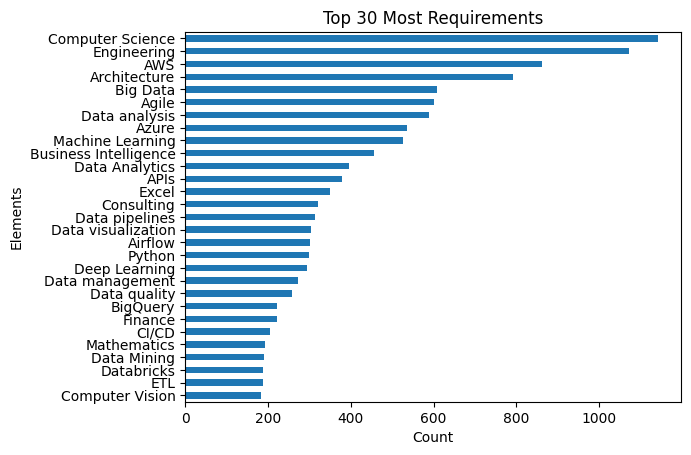

In [16]:
# Sort the top_elements in descending order
top_elements_sorted = top_elements.sort_values(ascending=True)

# Plot the column chart
top_elements_sorted.plot(kind='barh')

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Elements')
plt.title('Top 30 Most Requirements')

# Display the plot
plt.show()

## 5. DATA ANALYST MOST DESIRED SKILL

In [17]:
# Making it ready for the datavisualization tool

python = df[df['requirements'].str.contains('python', case=False)]

In [18]:
sql = df[df['requirements'].str.contains('sql', case=False)]

In [19]:
ex = df[df['requirements'].str.contains('Excel', case=False)]

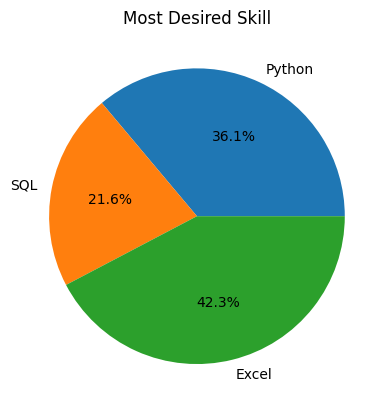

In [20]:
# Get the counts
python_count = len(python)
sql_count = len(sql)
excel_count = len(ex)

# Create a pie chart
labels = ['Python', 'SQL', 'Excel']
counts = [python_count, sql_count, excel_count]

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Most Desired Skill')

plt.show()

## 6. TABLEAU VS POWER BI

In [21]:
tb = df[df['requirements'].str.contains('tableau', case=False)]

In [22]:
pb = df[df['requirements'].str.contains('power bi', case=False)]

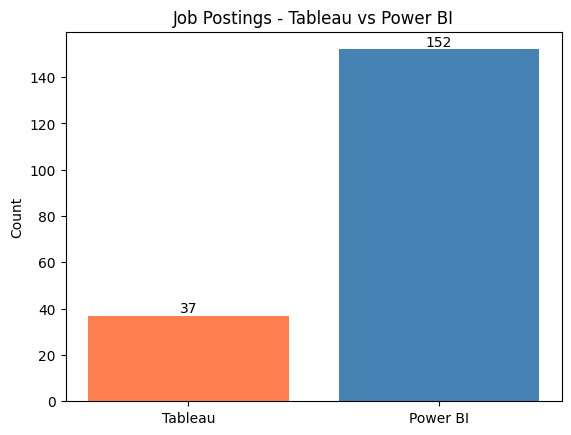

In [23]:
# Get the counts
tableau_count = len(tb)
power_bi_count = len(pb)

# Create a bar plot
labels = ['Tableau', 'Power BI']
counts = [tableau_count, power_bi_count]

# Define colors for the bars
colors = ['coral', 'steelblue']

plt.bar(labels, counts, color=colors)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Job Postings - Tableau vs Power BI')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## 7. IS THERE A CORRELATION BETWEEN SALARIES AND JOBS?

In [24]:
df['salary'] = df['salary'].str.replace('K','000')

In [25]:
df.dtypes

job_title           object
location            object
job_type            object
experience_level    object
salary              object
requirements        object
dtype: object

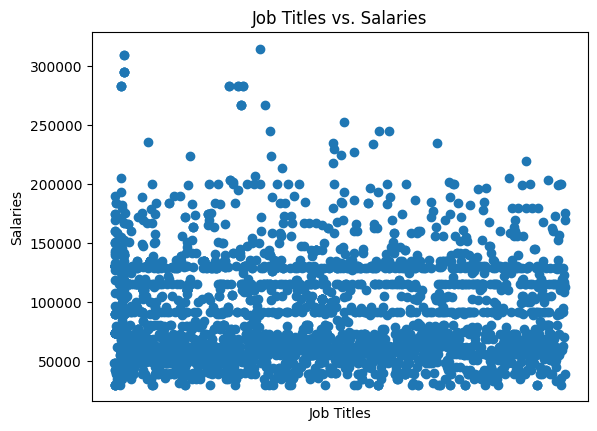

In [26]:
# Convert 'salary' column to numeric, with errors='coerce'
df['salary'] = pd.to_numeric(df['salary'])

# Remove rows with non-numeric 'salary' values
df = df.dropna(subset=['salary'])

# Create scatter plot
plt.scatter(df['job_title'], df['salary'])

# Customize plot
plt.title('Job Titles vs. Salaries')
plt.xlabel('Job Titles')
plt.ylabel('Salaries')

# Remove X legend
plt.xticks([])

# Display the plot
plt.show()

## 8. LEVELS DEMANDED COMPARISON 

In [27]:
# Create a new DataFrame with the count of experience levels
experience_counts = df['experience_level'].value_counts().reset_index()

# Rename the columns
experience_counts.columns = ['Experience Level', 'Count']

# Display the new DataFrame
experience_counts

,Experience Level,Count
0,Senior-level,1825
1,Mid-level,447
2,Entry-level,383
3,Executive-level,122


## 9. DATA JOBS WITH THE HIGHEST SALARIES

In [28]:
# Group the DataFrame by 'job_title' and get the 10 highest salaries for each group
top_salaries = df.groupby('job_title')['salary'].nlargest(10).reset_index()

# Sort the DataFrame in descending order by salary
top_salaries = top_salaries.sort_values(by='salary', ascending=False)

# Display the resulting DataFrame
top_salaries.head(10)

,job_title,level_1,salary
2318,"Senior/Principal ML Engineer, Content Understa...",868,315000.0
1030,Data Scientist,789,310000.0
1031,Data Scientist,1422,310000.0
1032,Data Scientist,688,295000.0
1033,Data Scientist,785,295000.0
1035,Data Scientist,1412,295000.0
1034,Data Scientist,1371,295000.0
1723,Principal Deep Learning Engineer - Computer Vi...,1440,283000.0
723,Data Engineer,732,283000.0
724,Data Engineer,1443,283000.0


## 10. THE HIGHEST SALARY FOR A DATA ANALYST

In [29]:
# Filter the DataFrame for 'Data Analyst' job title
data_analyst_salaries = df[df['job_title'] == 'Data Analyst']

# Get the top 5 highest salaries for Data Analyst
top_data_analyst_salaries = data_analyst_salaries.nlargest(3, 'salary')[['job_title', 'salary']]

# Display the top 5 highest salaries for Data Analyst
top_data_analyst_salaries

,job_title,salary
799,Data Analyst,153000.0
2414,Data Analyst,142000.0
1888,Data Analyst,140000.0


## LAST ARRANGEMENTS FOR DATA VISUALIZATION TOOL 

In [30]:
# Making it ready for the datavisualization tool

df['excel'] = df['requirements'].apply(lambda x: 'yes' if 'Excel' in x.lower() else 'no')

df['tableau'] = df['requirements'].apply(lambda x: 'yes' if 'tableau' in x.lower() else 'no')

df['power_bi'] = df['requirements'].apply(lambda x: 'yes' if 'power bi' in x.lower() else 'no')

df['sql'] = df['requirements'].apply(lambda x: 'yes' if 'sql' in x.lower() else 'no')

df['python'] = df['requirements'].apply(lambda x: 'yes' if 'python' in x.lower() else 'no')

In [31]:
df

,job_title,location,job_type,experience_level,salary,requirements,excel,tableau,power_bi,sql,python
0,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",no,no,no,no,no
1,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000.0,"Agile,Data management,Finance,Security,,",no,no,no,no,no
2,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90000.0,"Agile,Architecture,AWS,Computer Science,Comput...",no,no,no,no,no
3,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",no,no,yes,no,no
4,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000.0,"AWS,Azure,Computer Science,Consulting,Dataflow...",no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
3193,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39000.0,"APIs,Clustering,Computer Science,Data visualiz...",no,no,no,no,no
3194,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92000.0,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL",no,no,no,yes,no
3195,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62000.0,"E-commerce,Engineering,Linux,Python,Robotics,S...",no,no,no,no,yes
3196,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39000.0,"Computer Science,Data Analytics,Data Mining,Ec...",no,no,no,no,no


## SAVING IT TO A NEW CSV FILE

In [32]:
df.to_csv('BigDataJobs.csv', index=False)


## USING PYTHON AS A SQL QUERY

In [33]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['python'] == 'yes') &
                 (df['sql'] == 'yes') &
                 (df['excel'] == 'no') &
                 (df['power_bi'] == 'yes') &
                 (df['salary'] > 50000.0)]

# Retrieve the job titles and salaries from the filtered DataFrame
job_titles = filtered_df[['job_title', 'salary']]

# Sort the job titles in descending order by salary
sorted_job_titles = job_titles.sort_values(by='salary', ascending=False)

# Display the resulting job titles
sorted_job_titles

,job_title,salary
1278,Senior Vehicle Data Analyst,92000.0
1175,Data Analyst - Contract - 1 day a week,65000.0
1892,[RPG] Power BI Data Engineer,62000.0
2051,Power BI Data Engineer,62000.0
1467,Ingéni Data / Power BI (H/F),60000.0
726,302 - Data Analytics Specialist - CMS End Stag...,56000.0
2066,Power BI Developer,56000.0
